# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [38]:
# We can check and see what the columns look like with this code:
df.columns.str.lower()

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [72]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

df.columns


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [73]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [74]:
# Change the index to 'linename'
df = df.set_index('linename')

df.head()


,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Reset the index: 

In [75]:
# Reset the index
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [76]:
# Add a new 'num_lines' column
df['num_lines'] = df['linename'].str.len()

sort_df = df.sort_values(by= 'num_lines', ascending=False)

sort_df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
130929,1237ACENQRSW,R143,R032,02-00-01,TIMES SQ-42 ST,IRT,08/25/2018,12:00:00,REGULAR,1002408,1628454,12
130904,1237ACENQRSW,R143,R032,02-00-00,TIMES SQ-42 ST,IRT,08/28/2018,08:00:00,REGULAR,2223117,4044815,12
130912,1237ACENQRSW,R143,R032,02-00-00,TIMES SQ-42 ST,IRT,08/29/2018,16:00:00,REGULAR,2225660,4049926,12
130911,1237ACENQRSW,R143,R032,02-00-00,TIMES SQ-42 ST,IRT,08/29/2018,12:00:00,REGULAR,2225329,4049297,12
130910,1237ACENQRSW,R143,R032,02-00-00,TIMES SQ-42 ST,IRT,08/29/2018,08:00:00,REGULAR,2225002,4048007,12
...,...,...,...,...,...,...,...,...,...,...,...,...
197583,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/25/2018,01:00:00,REGULAR,5554,348,1
197584,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/25/2018,05:00:00,REGULAR,5554,348,1
197585,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/25/2018,09:00:00,REGULAR,5554,348,1
197586,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/25/2018,13:00:00,REGULAR,5554,348,1


Write a function to clean column names: 

In [77]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

In [78]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.str.strip()
    return cleaned

In [79]:
# Use the above function to clean the column names
df.columns = clean(df.columns)

In [80]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   linename   197625 non-null  object
 1   c/a        197625 non-null  object
 2   unit       197625 non-null  object
 3   scp        197625 non-null  object
 4   station    197625 non-null  object
 5   division   197625 non-null  object
 6   date       197625 non-null  object
 7   time       197625 non-null  object
 8   desc       197625 non-null  object
 9   entries    197625 non-null  int64 
 10  exits      197625 non-null  int64 
 11  num_lines  197625 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.1+ MB


In [82]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

df.head()


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7


In [83]:
df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,05:00:00,REGULAR,5554,348,1
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,09:00:00,REGULAR,5554,348,1
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,13:00:00,REGULAR,5554,348,1
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,17:00:00,REGULAR,5554,348,1


In [84]:
# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,05:00:00,REGULAR,5554,348,1,Friday
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,09:00:00,REGULAR,5554,348,1,Friday
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,13:00:00,REGULAR,5554,348,1,Friday
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,2018-08-31,17:00:00,REGULAR,5554,348,1,Friday


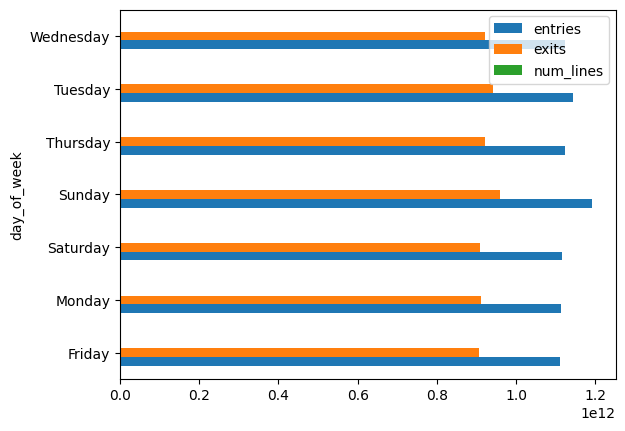

In [85]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [86]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped


,day_of_week,entries,exits,num_lines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607
5,Tuesday,1143313287046,942230721477,77303
6,Wednesday,1123655222441,920630864687,75713


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [90]:
# Use this dictionary to create a new column 
weekend_map = {'Monday':False, 'Tuesday':False, 'Wednesday':False, 'Thursday':False, 'Friday':False, 'Saturday':True, 'Sunday':True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [91]:
grouped

,day_of_week,entries,exits,num_lines,is_weekend
0,Friday,1110224700078,906799065337,75573,False
1,Monday,1114237052454,911938153513,76110,False
2,Saturday,1115661545514,909142081474,74725,True
3,Sunday,1192306179082,959223750461,75306,True
4,Thursday,1122723988662,920691927110,76607,False
5,Tuesday,1143313287046,942230721477,77303,False
6,Wednesday,1123655222441,920630864687,75713,False


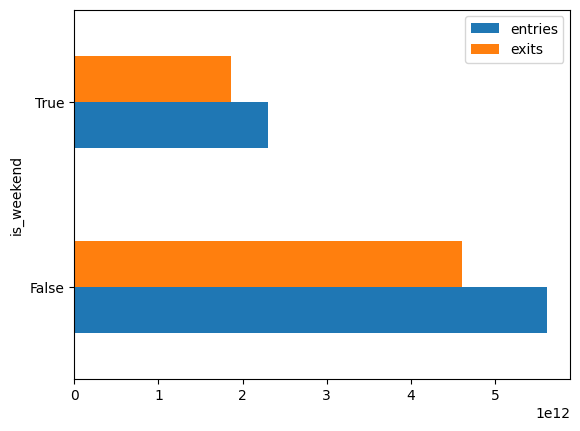

In [93]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

In [94]:
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines', 'day_of_week'],
      dtype='object')

Remove the `'c/a'` and `'scp'` columns. 

In [96]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a', 'scp'], axis=1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [97]:
# Your answer here 
print('The entries are more than the exits even though the same amount of people are boarding and alighting.')

The entries are more than the exits even though the same amount of people are boarding and alighting.


## Summary

You practiced your data cleanup skills using Pandas.